# Load file and pre-process it after lebelling sentiment  

In [253]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime
import nltk
from keras.callbacks import CSVLogger

In [698]:
# Read file
df = pd.read_excel('/Users/thaleslopes/Desktop/TCC/codes/tweets_sentiment.xlsx')
df

,text,sentiment,created_at
0,"rumo ao fundo do poço. dívida pública federal passa de r$ 4,5 tri com custo mais caro e prazo menor tesouro vê investidor preocupado com coronavírus e política econômica brasileira.",negative,2020-10-27 23:58:30
1,brasil registra mais 530 mortes pelo novo coronavírus em 24 horas,negative,2020-10-27 23:58:16
2,devia vir com coronavirus de brinde dentro dessa porcaria.,negative,2020-10-27 23:56:49
3,divinópolis registra 70 notificações de coronavírus em 24h,negative,2020-10-27 23:54:50
4,coronavírus chegou sem dó,negative,2020-10-27 23:53:52
...,...,...,...
2288,"não usar máscara, frequentar lugares lotados, negar a ciência falando que é gripezinha, pode se voluntariar para ajudar num avanço da medicina: crime",negative,2020-10-26 11:38:56
2289,colocaram tanto olho gordo na minha máscara anti gripezinha que eu acho que perdi ela! fui colocar hj de manhã e não achei,neutral,2020-10-26 11:37:00
2290,"chamamos a covid-19 de gripezinha, saímos para balada e vamos para praia aglomerar!!!! eita paizinho difícil!",negative,2020-10-26 11:36:35
2291,se tornou uma gripezinha,neutral,2020-10-26 10:48:13


## Tokenization + Stopwords, Punctuation, digits, single letters removal 

In [699]:
# Removing Stop Words, punctuations, Numbers and Special characters
import string
from nltk.corpus import stopwords

# Function to clean text from a dataframe, It performs:
# - Punctuation removal
# - Removal os stopwords in Portuguese

def message_cleaning(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)
    cleaned_tweets = [word for word in punc_removed_join.split() if word.lower() not in stopwords.words('portuguese')]

    return cleaned_tweets

def message_cleaning_keep_stopwords(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)

    return punc_removed_join

# Remove digits from text
df['text'] = df['text'].astype(str).str.replace('\d+', '')

# Remove single letters from text
df['text'] = [ re.sub(r'\b\w\b', '', text) for text in df['text'] ]

# Apply message cleaning
df['clean_text'] = df['text'].apply(message_cleaning)

# Apply message cleaning but keep stopwords
df['text'] = df['text'].apply(message_cleaning_keep_stopwords)

df

,text,sentiment,created_at,clean_text
0,rumo ao fundo do poço dívida pública federal passa de tri com custo mais caro prazo menor tesouro vê investidor preocupado com coronavírus política econômica brasileira,negative,2020-10-27 23:58:30,"[rumo, fundo, poço, dívida, pública, federal, passa, tri, custo, caro, prazo, menor, tesouro, vê, investidor, preocupado, coronavírus, política, econômica, brasileira]"
1,brasil registra mais mortes pelo novo coronavírus em horas,negative,2020-10-27 23:58:16,"[brasil, registra, mortes, novo, coronavírus, horas]"
2,devia vir com coronavirus de brinde dentro dessa porcaria,negative,2020-10-27 23:56:49,"[devia, vir, coronavirus, brinde, dentro, dessa, porcaria]"
3,divinópolis registra notificações de coronavírus em,negative,2020-10-27 23:54:50,"[divinópolis, registra, notificações, coronavírus]"
4,coronavírus chegou sem dó,negative,2020-10-27 23:53:52,"[coronavírus, chegou, dó]"
...,...,...,...,...
2288,não usar máscara frequentar lugares lotados negar ciência falando que gripezinha pode se voluntariar para ajudar num avanço da medicina crime,negative,2020-10-26 11:38:56,"[usar, máscara, frequentar, lugares, lotados, negar, ciência, falando, gripezinha, pode, voluntariar, ajudar, avanço, medicina, crime]"
2289,colocaram tanto olho gordo na minha máscara anti gripezinha que eu acho que perdi ela fui colocar hj de manhã não achei,neutral,2020-10-26 11:37:00,"[colocaram, tanto, olho, gordo, máscara, anti, gripezinha, acho, perdi, colocar, hj, manhã, achei]"
2290,chamamos covid de gripezinha saímos para balada vamos para praia aglomerar eita paizinho difícil,negative,2020-10-26 11:36:35,"[chamamos, covid, gripezinha, saímos, balada, vamos, praia, aglomerar, eita, paizinho, difícil]"
2291,se tornou uma gripezinha,neutral,2020-10-26 10:48:13,"[tornou, gripezinha]"


## Join Clean Text 

In [700]:
df['clean_join_text'] = df['clean_text'].apply(' '.join)
df

,text,sentiment,created_at,clean_text,clean_join_text
0,rumo ao fundo do poço dívida pública federal passa de tri com custo mais caro prazo menor tesouro vê investidor preocupado com coronavírus política econômica brasileira,negative,2020-10-27 23:58:30,"[rumo, fundo, poço, dívida, pública, federal, passa, tri, custo, caro, prazo, menor, tesouro, vê, investidor, preocupado, coronavírus, política, econômica, brasileira]",rumo fundo poço dívida pública federal passa tri custo caro prazo menor tesouro vê investidor preocupado coronavírus política econômica brasileira
1,brasil registra mais mortes pelo novo coronavírus em horas,negative,2020-10-27 23:58:16,"[brasil, registra, mortes, novo, coronavírus, horas]",brasil registra mortes novo coronavírus horas
2,devia vir com coronavirus de brinde dentro dessa porcaria,negative,2020-10-27 23:56:49,"[devia, vir, coronavirus, brinde, dentro, dessa, porcaria]",devia vir coronavirus brinde dentro dessa porcaria
3,divinópolis registra notificações de coronavírus em,negative,2020-10-27 23:54:50,"[divinópolis, registra, notificações, coronavírus]",divinópolis registra notificações coronavírus
4,coronavírus chegou sem dó,negative,2020-10-27 23:53:52,"[coronavírus, chegou, dó]",coronavírus chegou dó
...,...,...,...,...,...
2288,não usar máscara frequentar lugares lotados negar ciência falando que gripezinha pode se voluntariar para ajudar num avanço da medicina crime,negative,2020-10-26 11:38:56,"[usar, máscara, frequentar, lugares, lotados, negar, ciência, falando, gripezinha, pode, voluntariar, ajudar, avanço, medicina, crime]",usar máscara frequentar lugares lotados negar ciência falando gripezinha pode voluntariar ajudar avanço medicina crime
2289,colocaram tanto olho gordo na minha máscara anti gripezinha que eu acho que perdi ela fui colocar hj de manhã não achei,neutral,2020-10-26 11:37:00,"[colocaram, tanto, olho, gordo, máscara, anti, gripezinha, acho, perdi, colocar, hj, manhã, achei]",colocaram tanto olho gordo máscara anti gripezinha acho perdi colocar hj manhã achei
2290,chamamos covid de gripezinha saímos para balada vamos para praia aglomerar eita paizinho difícil,negative,2020-10-26 11:36:35,"[chamamos, covid, gripezinha, saímos, balada, vamos, praia, aglomerar, eita, paizinho, difícil]",chamamos covid gripezinha saímos balada vamos praia aglomerar eita paizinho difícil
2291,se tornou uma gripezinha,neutral,2020-10-26 10:48:13,"[tornou, gripezinha]",tornou gripezinha


## Wordclouds 

In [569]:
from wordcloud import WordCloud

In [570]:
# Plot General Wordcloud

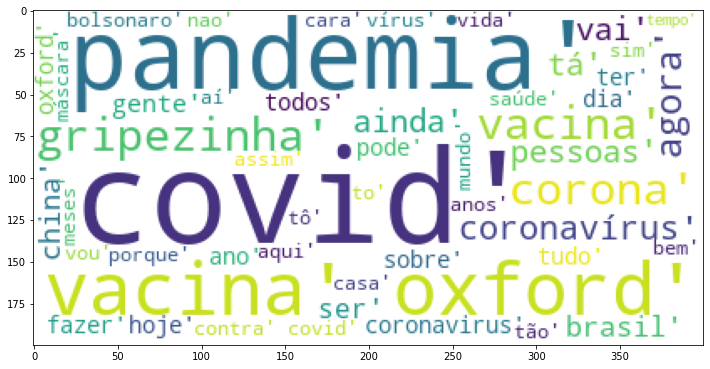

In [571]:
clean_tweets_join = "".join(map(str,df['clean_text']))

plt.figure(figsize=(12,12))
plt.imshow(WordCloud(background_color='white',max_words=50).generate(clean_tweets_join))

In [572]:
# Plot Wordcloud with Positive Tweets

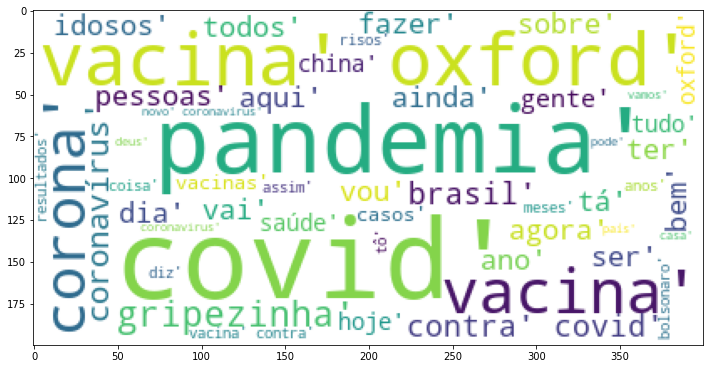

In [573]:
positive = df[df['sentiment'] == 'positive']

positive_list = "".join(map(str,positive['clean_text']))

plt.figure(figsize=(12,12))
plt.imshow(WordCloud(background_color='white',max_words=50).generate(positive_list))

In [574]:
# Plot Wordcloud with Negative Tweets

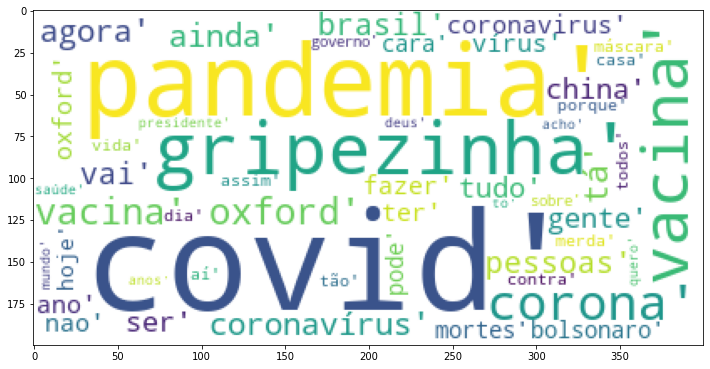

In [575]:
negative = df[df['sentiment'] == 'negative']

negative_list = "".join(map(str,negative['clean_text']))

plt.figure(figsize=(12,12))
plt.imshow(WordCloud(background_color='white',max_words=50).generate(negative_list))

In [576]:
# Plot Wordcloud with Neutral Tweets

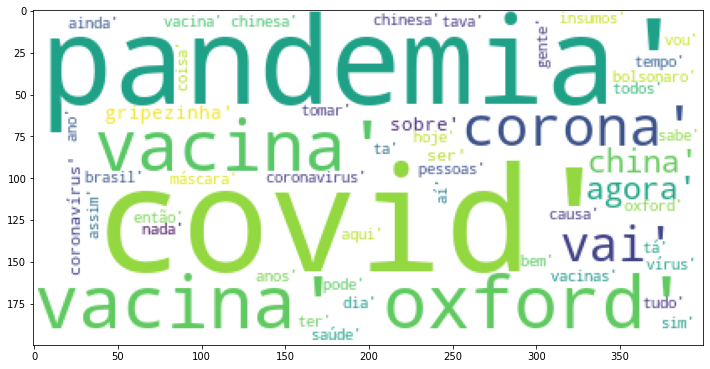

In [577]:
neutral = df[df['sentiment'] == 'neutral']

neutral_list = "".join(map(str,neutral['clean_text']))

plt.figure(figsize=(12,12))
plt.imshow(WordCloud(background_color='white',max_words=50).generate(neutral_list))

## Divide Dataset in Train / Test

In [578]:
# Functions to analyse division of dataset into train, val and test
def get_class_counts(df):
    gpr = df.groupby(['sentiment'])['text'].nunique()
    return {key: gpr[key] for key in list (gpr.keys())}

def get_class_proportions(df):
    class_counts = get_class_counts(df)
    return {val[0]: round(val[1]/df.shape[0],4) for val in class_counts.items()}

In [579]:
# Generate Multilabel Binarizer
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html

y = df['sentiment'].str.split(expand=False)

mlb = MultiLabelBinarizer()

df_one_hot = pd.DataFrame(mlb.fit_transform(y), columns=mlb.classes_)
df_one_hot = pd.concat((df, df_one_hot), axis = 1)
df_one_hot = df_one_hot[['text', 'clean_join_text','positive','negative','neutral', 'sentiment']]

df_one_hot

,text,clean_join_text,positive,negative,neutral,sentiment
0,rumo ao fundo do poço dívida pública federal passa de tri com custo mais caro prazo menor tesouro vê investidor preocupado com coronavírus política econômica brasileira,rumo fundo poço dívida pública federal passa tri custo caro prazo menor tesouro vê investidor preocupado coronavírus política econômica brasileira,0,1,0,negative
1,brasil registra mais mortes pelo novo coronavírus em horas,brasil registra mortes novo coronavírus horas,0,1,0,negative
2,devia vir com coronavirus de brinde dentro dessa porcaria,devia vir coronavirus brinde dentro dessa porcaria,0,1,0,negative
3,divinópolis registra notificações de coronavírus em,divinópolis registra notificações coronavírus,0,1,0,negative
4,coronavírus chegou sem dó,coronavírus chegou dó,0,1,0,negative
...,...,...,...,...,...,...
2288,não usar máscara frequentar lugares lotados negar ciência falando que gripezinha pode se voluntariar para ajudar num avanço da medicina crime,usar máscara frequentar lugares lotados negar ciência falando gripezinha pode voluntariar ajudar avanço medicina crime,0,1,0,negative
2289,colocaram tanto olho gordo na minha máscara anti gripezinha que eu acho que perdi ela fui colocar hj de manhã não achei,colocaram tanto olho gordo máscara anti gripezinha acho perdi colocar hj manhã achei,0,0,1,neutral
2290,chamamos covid de gripezinha saímos para balada vamos para praia aglomerar eita paizinho difícil,chamamos covid gripezinha saímos balada vamos praia aglomerar eita paizinho difícil,0,1,0,negative
2291,se tornou uma gripezinha,tornou gripezinha,0,0,1,neutral


In [580]:
# Get proportions for full dataset
print("Dataset class counts:", get_class_counts(df_one_hot))
print("Dataset class proportions:", get_class_proportions(df_one_hot))

Dataset class counts: {'negative': 1128, 'neutral': 464, 'positive': 698}
Dataset class proportions: {'negative': 0.4919, 'neutral': 0.2024, 'positive': 0.3044}


In [581]:
# Divide dataset 
from skmultilearn.model_selection import iterative_train_test_split

x = df_one_hot['text']
y = df_one_hot[['positive','negative','neutral']]

X_train, y_train, X_test, y_test = iterative_train_test_split(df_one_hot.values, 
                                                              y.values, test_size=0.2)

train_text, train_labels, temp_text, temp_labels = iterative_train_test_split(df_one_hot.values, 
                                                                              y.values, test_size=0.3)

val_text, val_labels, test_text, test_labels = iterative_train_test_split(temp_text,
                                                                          temp_labels, test_size=0.5)

In [582]:
# Transform lists generated by the method iterative_train_test_split() back to dataframes
train_text = pd.DataFrame(data=train_text, columns = ['text', 'clean_join_text','positive','negative',
                                                      'neutral', 'sentiment'])
train_labels = pd.DataFrame(data=train_labels, columns = ['positive','negative','neutral'])

test_text = pd.DataFrame(data=test_text, columns = ['text', 'clean_join_text','positive','negative',
                                                      'neutral', 'sentiment'])
test_labels = pd.DataFrame(data=test_labels, columns = ['positive','negative','neutral'])

val_text = pd.DataFrame(data=val_text, columns = ['text', 'clean_join_text','positive','negative',
                                                      'neutral', 'sentiment'])
val_labels = pd.DataFrame(data=val_labels, columns = ['positive','negative','neutral'])

In [583]:
# Get proportions for train dataset
print("Train data class counts:", get_class_counts(train_text))
print("Train data class proportions:", get_class_proportions(train_text))

Train data class counts: {'negative': 792, 'neutral': 325, 'positive': 489}
Train data class proportions: {'negative': 0.4932, 'neutral': 0.2024, 'positive': 0.3045}


In [584]:
# Get proportions for val dataset
print("Val data class counts:", get_class_counts(val_text))
print("Val data class proportions:", get_class_proportions(val_text))

Val data class counts: {'negative': 169, 'neutral': 69, 'positive': 104}
Val data class proportions: {'negative': 0.4942, 'neutral': 0.2018, 'positive': 0.3041}


In [585]:
# Get proportions for test dataset
print("Test data class counts:", get_class_counts(test_text))
print("Test data class proportions:", get_class_proportions(test_text))

Test data class counts: {'negative': 169, 'neutral': 70, 'positive': 105}
Test data class proportions: {'negative': 0.4899, 'neutral': 0.2029, 'positive': 0.3043}


# Embedding layer & Load / Pre-process data
The primary use of an embedding layer is to convert categorical sparse features into dense smaller vector representations. An embedding layer can be seen as a lookup table and is defined by a matrix W.

In [598]:
# We will begin by importing some required modules for performing text classification in ktrain.
import keras
import ktrain
from ktrain import text
from ipywidgets import IntProgress
from sklearn import metrics
import scikitplot as skplt
import time
from sklearn.metrics import classification_report
from skplt.metrics import plot_confusion_matrix

In [599]:
# The print_text_classifier function prints some available models.
# The model selected should be consistent with the preprocess_mode selected above
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


<AxesSubplot:>

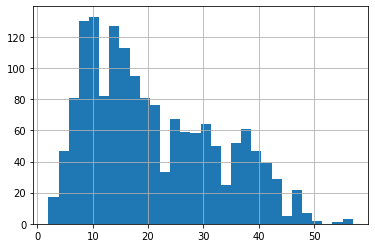

In [600]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text['text']]

pd.Series(seq_len).hist(bins = 30)

## BERT
The Bidirectional Encoder Representation from Transformers is a language model based on Transformer Encoders that, unlike preceding works that used unidirectional Language Models (LMs), is designed to pre-train deep bidirectional word representations that are jointly conditioned on both left and right contexts.

### Load and pre-process data for train, test and validation 

In [601]:
# Create vectors https://github.com/amaiya/ktrain/blob/master/ktrain/text/data.py

# Load and preprocess the text data for training and validation. 
# ktrain can load texts and associated labels from a variety of sources. The one we will be using is
# texts_from_df: texts and associated labels are stored in columns in a pandas DataFrame 


# Bert for Clean Text joined in form of a sentence
(x_train_bert, y_train_bert), (x_test_bert, y_test_bert), preproc_bert = text.texts_from_df(train_text,
                                                        text_column='clean_join_text',
                                                        label_columns=['positive','negative','neutral'],
                                                        maxlen=50, preprocess_mode = 'bert', lang = 'pt',
                                                        ngram_range=1, val_df = val_text)

# Bert for the full text
(full_x_train_bert, full_y_train_bert), (full_x_test_bert, full_y_test_bert), preproc_bert_full = text.texts_from_df(train_text,
                                                        text_column='text',
                                                        label_columns=['positive','negative','neutral'],
                                                        maxlen=50, preprocess_mode = 'bert', lang = 'pt',
                                                        ngram_range=1, val_df = val_text)

preprocessing train...
language: pt


Is Multi-Label? False
preprocessing test...
language: pt


preprocessing train...
language: pt


Is Multi-Label? False
preprocessing test...
language: pt


### Load models & instantiate Learner object

In [602]:
# Load an BERT model - Cleaned text
bert_model = text.text_classifier('bert', train_data=(x_train_bert, y_train_bert),
                                  preproc=preproc_bert, multilabel=False)
bert_learner = ktrain.get_learner(bert_model, train_data=(x_train_bert, y_train_bert),
                                  val_data=(x_test_bert, y_test_bert), batch_size=16)

# Load an BERT model - Full text
full_bert_model = text.text_classifier('bert', train_data=(full_x_train_bert, full_y_train_bert),
                                  preproc=preproc_bert_full, multilabel=False)
full_bert_learner = ktrain.get_learner(full_bert_model, train_data=(full_x_train_bert, full_y_train_bert),
                                  val_data=(full_x_test_bert, full_y_test_bert), batch_size=16)

Is Multi-Label? False
maxlen is 50
done.
Is Multi-Label? False
maxlen is 50
done.


### Find optimal learning rate 

simulating training for different learning rates... this may take a few moments...
Epoch 1/3
101/101 [==============================] - 233s 2s/step - loss: 1.0898 - accuracy: 0.3836
Epoch 2/3
101/101 [==============================] - 244s 2s/step - loss: 1.4913 - accuracy: 0.4103
Epoch 3/3
101/101 [==============================] - 244s 2s/step - loss: 16.5178 - accuracy: 0.3923


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


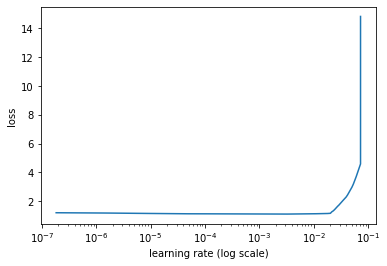

In [603]:
bert_learner.lr_find(max_epochs=3)
bert_learner.lr_plot()

simulating training for different learning rates... this may take a few moments...
Epoch 1/3
101/101 [==============================] - 248s 2s/step - loss: 1.0419 - accuracy: 0.4925
Epoch 2/3
101/101 [==============================] - 252s 2s/step - loss: 1.3796 - accuracy: 0.4259
Epoch 3/3
101/101 [==============================] - 250s 2s/step - loss: 36.7060 - accuracy: 0.3724


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


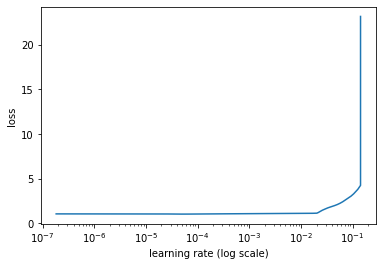

In [604]:
full_bert_learner.lr_find(max_epochs=3)
full_bert_learner.lr_plot()

### Train models

In [605]:
# model with cleaned text
csv_logger = CSVLogger("bert_model_history_log_autofit.csv", append=True)

# employs a triangular learning rate policy with both maximum
# and base learning rates reduced when validation loss stalls

#We train using one of the three learning rates recommended in the BERT paper: 5e-5, 3e-5, or 2e-5. 

startTime = time.time()
bert_learner.autofit(2e-5, reduce_on_plateau=3, callbacks=[csv_logger])
print ('BERT algorithm took {0} seconds to be trained!'.format(time.time() - startTime))

early_stopping automatically enabled at patience=5


begin training using triangular learning rate policy with max lr of 2e-05...
Epoch 1/1024
101/101 [==============================] - 258s 3s/step - loss: 1.0411 - accuracy: 0.4819 - val_loss: 0.9923 - val_accuracy: 0.5614
Epoch 2/1024
101/101 [==============================] - 270s 3s/step - loss: 1.0004 - accuracy: 0.5149 - val_loss: 0.9875 - val_accuracy: 0.5585
Epoch 3/1024
101/101 [==============================] - 268s 3s/step - loss: 0.9149 - accuracy: 0.5890 - val_loss: 0.9657 - val_accuracy: 0.5760
Epoch 4/1024
101/101 [==============================] - 261s 3s/step - loss: 0.7498 - accuracy: 0.6768 - val_loss: 1.0329 - val_accuracy: 0.5673
Epoch 5/1024
101/101 [==============================] - 257s 3s/step - loss: 0.5704 - accuracy: 0.7765 - val_loss: 1.0871 - val_accuracy: 0.5117
Epoch 6/1024
101/101 [==============================] - ETA: 0s - loss: 0.3889 - accuracy: 0.8549
Epoch 00006: Reducing Max LR on Plateau: new ma

In [653]:
bert_learner.validate(class_names=preproc_bert.get_classes())

              precision    recall  f1-score   support

    positive       0.49      0.62      0.55       104
    negative       0.65      0.73      0.69       169
     neutral       0.41      0.13      0.20        69

    accuracy                           0.58       342
   macro avg       0.52      0.49      0.48       342
weighted avg       0.56      0.58      0.55       342



array([[ 65,  34,   5],
       [ 38, 123,   8],
       [ 29,  31,   9]])

In [607]:
# model with full text
csv_logger = CSVLogger("full_bert_model_history_log_autofit.csv", append=True)

# employs a triangular learning rate policy with both maximum
# and base learning rates reduced when validation loss stalls

# We train using one of the three learning rates recommended in the BERT paper: 5e-5, 3e-5, or 2e-5.
startTime = time.time()
full_bert_learner.autofit(2e-5, reduce_on_plateau=3, callbacks=[csv_logger])
print ('BERT algorithm with full text took {0} seconds to be trained!'.format(time.time() - startTime))

early_stopping automatically enabled at patience=5


begin training using triangular learning rate policy with max lr of 2e-05...
Epoch 1/1024
101/101 [==============================] - 242s 2s/step - loss: 1.0321 - accuracy: 0.4975 - val_loss: 0.9972 - val_accuracy: 0.5702
Epoch 2/1024
101/101 [==============================] - 239s 2s/step - loss: 0.9516 - accuracy: 0.5654 - val_loss: 0.9620 - val_accuracy: 0.5556
Epoch 3/1024
101/101 [==============================] - 239s 2s/step - loss: 0.8099 - accuracy: 0.6494 - val_loss: 0.9302 - val_accuracy: 0.5526
Epoch 4/1024
101/101 [==============================] - 238s 2s/step - loss: 0.6160 - accuracy: 0.7497 - val_loss: 1.0738 - val_accuracy: 0.5614
Epoch 5/1024
101/101 [==============================] - 237s 2s/step - loss: 0.4239 - accuracy: 0.8462 - val_loss: 1.1356 - val_accuracy: 0.5936
Epoch 6/1024
101/101 [==============================] - ETA: 0s - loss: 0.2637 - accuracy: 0.9128
Epoch 00006: Reducing Max LR on Plateau: new ma

In [608]:
full_bert_learner.validate(class_names=preproc_bert_full.get_classes())

              precision    recall  f1-score   support

    positive       0.53      0.55      0.54       104
    negative       0.61      0.70      0.65       169
     neutral       0.35      0.20      0.26        69

    accuracy                           0.55       342
   macro avg       0.50      0.48      0.48       342
weighted avg       0.53      0.55      0.54       342



array([[ 57,  38,   9],
       [ 34, 118,  17],
       [ 17,  38,  14]])

### Making preditions and evaluating model

#### BERT - Clean text 

In [675]:
predictor_bert = ktrain.get_predictor(bert_learner.model, preproc_bert)
classes = predictor_bert.get_classes()
y_pred_bert = predictor_bert.predict(test_text["text"].tolist())

              precision    recall  f1-score   support

    negative       0.59      0.79      0.67       170
     neutral       0.40      0.11      0.18        70
    positive       0.50      0.46      0.48       105

    accuracy                           0.55       345
   macro avg       0.50      0.45      0.44       345
weighted avg       0.52      0.55      0.51       345



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

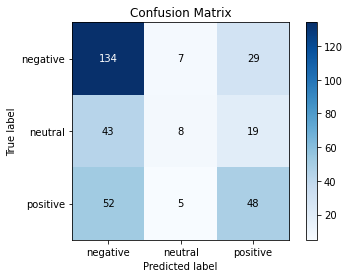

In [676]:
print(classification_report(test_text["sentiment"],y_pred_bert))
skplt.metrics.plot_confusion_matrix(test_text["sentiment"],y_pred_bert, cmap = plt.cm.Blues)

#### BERT - Full text 

In [677]:
full_predictor_bert = ktrain.get_predictor(full_bert_learner.model, preproc_bert_full)
classes = full_predictor_bert.get_classes()
y_pred_bert_full = full_predictor_bert.predict(test_text["text"].tolist())

              precision    recall  f1-score   support

    negative       0.60      0.71      0.65       170
     neutral       0.42      0.23      0.30        70
    positive       0.50      0.50      0.50       105

    accuracy                           0.55       345
   macro avg       0.51      0.48      0.48       345
weighted avg       0.53      0.55      0.53       345



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

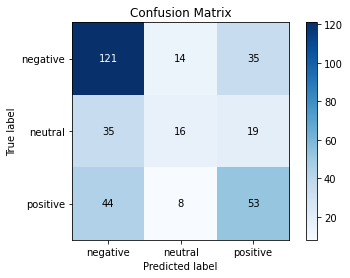

In [678]:
print(classification_report(test_text["sentiment"], y_pred_bert_full))
skplt.metrics.plot_confusion_matrix(test_text["sentiment"], y_pred_bert_full, cmap = plt.cm.Blues)

## DISTILBERT
A method to pre-train a smaller general-purpose language representation model which can then be fine-tuned with good performances on a wide range of tasks like its larger counterparts. While most prior work investigated the use of distillation for building task-specific models, we leverage knowledge distillation during the pre-training phase and show that it is possible to reduce the size of a BERT model by 40%, while retaining 97% of its language understanding capabilities and being 60% faster.

### Load and pre-process data for train, test and validation 

In [662]:
# Distilbert for Clean Text joined in form of a sentence
(train_data_distilbert), (test_data_distilbert), preproc_distilbert = text.texts_from_df(train_text,
                                                        text_column='clean_join_text',
                                                        label_columns=['positive','negative','neutral'],
                                                        maxlen=50, preprocess_mode = 'distilbert', lang = 'pt',
                                                        ngram_range=1, val_df = val_text)

# Bert for the full text
(full_train_data_distilbert), (full_test_data_distilbert), full_preproc_distilbert = text.texts_from_df(train_text,
                                                        text_column='text',
                                                        label_columns=['positive','negative','neutral'],
                                                        maxlen=50, preprocess_mode = 'distilbert', lang = 'pt',
                                                        ngram_range=1, val_df = val_text)

preprocessing train...
language: pt
train sequence lengths:
	mean : 13
	95percentile : 26
	99percentile : 29


Is Multi-Label? False
preprocessing test...
language: pt
test sequence lengths:
	mean : 14
	95percentile : 26
	99percentile : 30


preprocessing train...
language: pt
train sequence lengths:
	mean : 21
	95percentile : 42
	99percentile : 47


Is Multi-Label? False
preprocessing test...
language: pt
test sequence lengths:
	mean : 21
	95percentile : 41
	99percentile : 46


### Load models & instantiate Learner object

In [663]:
# Load an DISTILBERT model - Cleaned text
distilbert_model = text.text_classifier('distilbert', train_data=(train_data_distilbert),
                                        preproc=preproc_distilbert, multilabel=True)

# Load an DISTILBERT model - Full text
full_distilbert_model = text.text_classifier('distilbert', train_data=(full_train_data_distilbert),
                                        preproc=full_preproc_distilbert, multilabel=True)

Is Multi-Label? True
maxlen is 50
done.
Is Multi-Label? True
maxlen is 50
done.


In [664]:
# Instance of a Learner object and call the lr_find and lr_plot methods to help identify a good learning rate.

# Cleaned text
distilbert_learner = ktrain.get_learner(distilbert_model, train_data=(train_data_distilbert),
                                        val_data=(test_data_distilbert), batch_size=16)

# Full Text
full_distilbert_learner = ktrain.get_learner(full_distilbert_model, train_data=(full_train_data_distilbert),
                                        val_data=(full_test_data_distilbert), batch_size=16)

### Find optimal learning rate 

simulating training for different learning rates... this may take a few moments...
Epoch 1/3
100/100 [==============================] - 114s 1s/step - loss: 1.0766 - accuracy: 0.4538
Epoch 2/3
100/100 [==============================] - 119s 1s/step - loss: 1.0928 - accuracy: 0.4560
Epoch 3/3
100/100 [==============================] - 178s 2s/step - loss: 2104861.2500 - accuracy: 0.4566


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


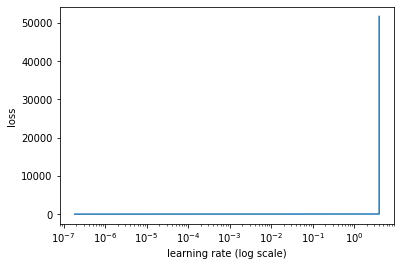

In [665]:
# Cleaned Text
distilbert_learner.lr_find(max_epochs=3)
distilbert_learner.lr_plot()

simulating training for different learning rates... this may take a few moments...
Epoch 1/3
100/100 [==============================] - 121s 1s/step - loss: 1.0692 - accuracy: 0.4206
Epoch 2/3
100/100 [==============================] - 123s 1s/step - loss: 1.0841 - accuracy: 0.4629
Epoch 3/3
100/100 [==============================] - 119s 1s/step - loss: 1360.5109 - accuracy: 0.4107


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


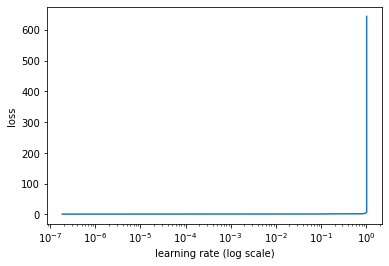

In [666]:
# Full Text
full_distilbert_learner.lr_find(max_epochs=3)
full_distilbert_learner.lr_plot()

### Train models

In [667]:
# Cleaned Text
csv_logger = CSVLogger("distilbert_model_history_log_autofit.csv", append=True)

# employs a triangular learning rate policy with both maximum
# and base learning rates reduced when validation loss stalls

startTime = time.time()
distilbert_learner.autofit(1e-5, reduce_on_plateau=3, callbacks=[csv_logger])
print ('DistilBERT algorithm took {0} seconds to be trained!'.format(time.time() - startTime))

early_stopping automatically enabled at patience=5


begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/1024
101/101 [==============================] - 165s 2s/step - loss: 1.0494 - accuracy: 0.4826 - val_loss: 1.0278 - val_accuracy: 0.4942
Epoch 2/1024
101/101 [==============================] - 136s 1s/step - loss: 1.0051 - accuracy: 0.5075 - val_loss: 0.9951 - val_accuracy: 0.5292
Epoch 3/1024
101/101 [==============================] - 124s 1s/step - loss: 0.9483 - accuracy: 0.5610 - val_loss: 0.9507 - val_accuracy: 0.5673
Epoch 4/1024
101/101 [==============================] - 120s 1s/step - loss: 0.8592 - accuracy: 0.6258 - val_loss: 0.9517 - val_accuracy: 0.5585
Epoch 5/1024
101/101 [==============================] - 118s 1s/step - loss: 0.7580 - accuracy: 0.6756 - val_loss: 1.0004 - val_accuracy: 0.5146
Epoch 6/1024
101/101 [==============================] - ETA: 0s - loss: 0.6784 - accuracy: 0.7279
Epoch 00006: Reducing Max LR on Plateau: new ma

In [668]:
distilbert_learner.validate(class_names=preproc_distilbert.get_classes())

              precision    recall  f1-score   support

    positive       0.44      0.61      0.51       104
    negative       0.66      0.78      0.71       169
     neutral       0.00      0.00      0.00        69

    accuracy                           0.57       342
   macro avg       0.37      0.46      0.41       342
weighted avg       0.46      0.57      0.51       342



/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  


array([[ 63,  41,   0],
       [ 38, 131,   0],
       [ 41,  28,   0]])

In [669]:
# Full Text
csv_logger = CSVLogger("full_distilbert_model_history_log_autofit.csv", append=True)

# employs a triangular learning rate policy with both maximum
# and base learning rates reduced when validation loss stalls
startTime = time.time()
full_distilbert_learner.autofit(1e-5, reduce_on_plateau=3, callbacks=[csv_logger])
print ('DistilBERT algorithm with full text took {0} seconds to be trained!'.format(time.time() - startTime))

early_stopping automatically enabled at patience=5


begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/1024
101/101 [==============================] - 123s 1s/step - loss: 1.0457 - accuracy: 0.4751 - val_loss: 1.0214 - val_accuracy: 0.4942
Epoch 2/1024
101/101 [==============================] - 136s 1s/step - loss: 1.0120 - accuracy: 0.4994 - val_loss: 1.0024 - val_accuracy: 0.5029
Epoch 3/1024
101/101 [==============================] - 153s 2s/step - loss: 0.9666 - accuracy: 0.5486 - val_loss: 0.9655 - val_accuracy: 0.5556
Epoch 4/1024
101/101 [==============================] - 123s 1s/step - loss: 0.8821 - accuracy: 0.6071 - val_loss: 0.9339 - val_accuracy: 0.5614
Epoch 5/1024
101/101 [==============================] - 116s 1s/step - loss: 0.7830 - accuracy: 0.6638 - val_loss: 0.9724 - val_accuracy: 0.5380
Epoch 6/1024
101/101 [==============================] - 116s 1s/step - loss: 0.6896 - accuracy: 0.7136 - val_loss: 0.9684 - val_accuracy: 0.5819


In [670]:
full_distilbert_learner.validate(class_names=full_preproc_distilbert.get_classes())

              precision    recall  f1-score   support

    positive       0.46      0.62      0.53       104
    negative       0.63      0.76      0.69       169
     neutral       0.00      0.00      0.00        69

    accuracy                           0.56       342
   macro avg       0.36      0.46      0.41       342
weighted avg       0.45      0.56      0.50       342



array([[ 64,  39,   1],
       [ 41, 128,   0],
       [ 34,  35,   0]])

### Making preditions and evaluating model

#### DistilBERT - Clean Text 

In [679]:
predictor_distilbert = ktrain.get_predictor(distilbert_learner.model, preproc_distilbert)
classes = predictor_distilbert.get_classes()
y_pred_distilbert = predictor_distilbert.predict(test_text["text"].tolist())

              precision    recall  f1-score   support

    negative       0.62      0.69      0.65       170
     neutral       0.00      0.00      0.00        70
    positive       0.42      0.62      0.50       105

    accuracy                           0.53       345
   macro avg       0.35      0.44      0.39       345
weighted avg       0.43      0.53      0.47       345



/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

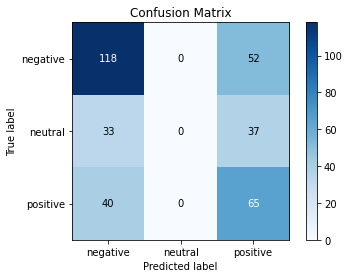

In [680]:
print(classification_report(test_text["sentiment"], y_pred_distilbert))
skplt.metrics.plot_confusion_matrix(test_text["sentiment"], y_pred_distilbert, cmap = plt.cm.Blues)

#### DistilBERT - Full Text 

In [681]:
full_predictor_distilbert = ktrain.get_predictor(full_distilbert_learner.model, full_preproc_distilbert)
classes = full_predictor_distilbert.get_classes()
y_pred_distilbert_full = full_predictor_distilbert.predict(test_text["text"].tolist())

              precision    recall  f1-score   support

    negative       0.61      0.74      0.66       170
     neutral       0.00      0.00      0.00        70
    positive       0.45      0.60      0.52       105

    accuracy                           0.54       345
   macro avg       0.35      0.45      0.39       345
weighted avg       0.44      0.54      0.48       345



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

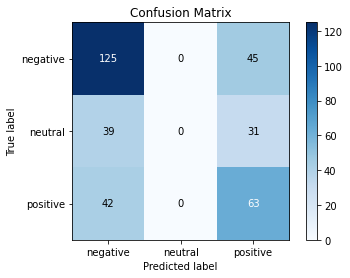

In [682]:
print(classification_report(test_text["sentiment"], y_pred_distilbert_full))
skplt.metrics.plot_confusion_matrix(test_text["sentiment"], y_pred_distilbert_full, cmap = plt.cm.Blues)

## NBSVM
NBSVM is an approach to text classification proposed by Wang and Manning¹ that takes a linear model such as SVM (or logistic regression) and infuses it with Bayesian probabilities by replacing word count features with Naive Bayes log-count ratios. Despite its simplicity, NBSVM models have been shown to be both fast and powerful across a wide range of different text classification datasets.

https://medium.com/@asmaiya/a-neural-implementation-of-nbsvm-in-keras-d4ef8c96cb7c

### Load and pre-process data for train, test and validation  

In [685]:
# NBSVM for Clean Text joined in form of a sentence
(x_train_nbsvm, y_train_nbsvm), (x_test_nbsvm, y_test_nbsvm), preproc_nbsvm = text.texts_from_df(train_text, 
                                                        text_column='clean_join_text',
                                                        label_columns=['positive','negative','neutral'],
                                                        maxlen=50, preprocess_mode = 'standard', lang = 'pt',
                                                        ngram_range=1, val_df = val_text)

# NBSVM for Full Text
(full_x_train_nbsvm, full_y_train_nbsvm), (full_x_test_nbsvm, full_y_test_nbsvm), full_preproc_nbsvm = text.texts_from_df(train_text, 
                                                        text_column='text',
                                                        label_columns=['positive','negative','neutral'],
                                                        maxlen=50, preprocess_mode = 'standard', lang = 'pt',
                                                        ngram_range=1, val_df = val_text)

language: pt
Word Counts: 6357
Nrows: 1606
1606 train sequences
train sequence lengths:
	mean : 13
	95percentile : 26
	99percentile : 29
x_train shape: (1606,50)
y_train shape: (1606, 3)
Is Multi-Label? False
342 test sequences
test sequence lengths:
	mean : 11
	95percentile : 21
	99percentile : 26
x_test shape: (342,50)
y_test shape: (342, 3)
language: pt
Word Counts: 6510
Nrows: 1606
1606 train sequences
train sequence lengths:
	mean : 21
	95percentile : 42
	99percentile : 47
x_train shape: (1606,50)
y_train shape: (1606, 3)
Is Multi-Label? False
342 test sequences
test sequence lengths:
	mean : 19
	95percentile : 37
	99percentile : 44
x_test shape: (342,50)
y_test shape: (342, 3)


### Load models & instantiate Learner object

In [686]:
# Load an NBSVM model - Cleaned Text
nbsvm_model = text.text_classifier('nbsvm', train_data=(x_train_nbsvm, y_train_nbsvm),
                                   preproc=preproc_nbsvm, multilabel=False)

# Load an NBSVM model - Full Text
full_nbsvm_model = text.text_classifier('nbsvm', train_data=(full_x_train_nbsvm, full_y_train_nbsvm),
                                   preproc=full_preproc_nbsvm, multilabel=False)

Is Multi-Label? False
compiling word ID features...
maxlen is 50
building document-term matrix... this may take a few moments...
rows: 1-1606
computing log-count ratios...
done.
Is Multi-Label? False
compiling word ID features...
maxlen is 50
building document-term matrix... this may take a few moments...
rows: 1-1606
computing log-count ratios...
done.


In [687]:
# Instance of a Learner object and call the lr_find and lr_plot methods to help identify a good learning rate.

# Cleaned Text
nbsvm_learner = ktrain.get_learner(nbsvm_model, train_data=(x_train_nbsvm, y_train_nbsvm),
                                   val_data=(x_test_nbsvm, y_test_nbsvm), batch_size=16)

# Full Text
full_nbsvm_learner = ktrain.get_learner(full_nbsvm_model, train_data=(full_x_train_nbsvm, full_y_train_nbsvm),
                                   val_data=(full_x_test_nbsvm, full_y_test_nbsvm), batch_size=16)

### Find optimal learning rate 

simulating training for different learning rates... this may take a few moments...
Epoch 1/20
101/101 [==============================] - 0s 775us/step - loss: 1.0977 - accuracy: 0.4141
Epoch 2/20
101/101 [==============================] - 0s 737us/step - loss: 1.0977 - accuracy: 0.4141
Epoch 3/20
101/101 [==============================] - 0s 732us/step - loss: 1.0976 - accuracy: 0.4147
Epoch 4/20
101/101 [==============================] - 0s 752us/step - loss: 1.0975 - accuracy: 0.4153
Epoch 5/20
101/101 [==============================] - 0s 746us/step - loss: 1.0972 - accuracy: 0.4197
Epoch 6/20
101/101 [==============================] - 0s 739us/step - loss: 1.0964 - accuracy: 0.4271
Epoch 7/20
101/101 [==============================] - 0s 763us/step - loss: 1.0943 - accuracy: 0.4346
Epoch 8/20
101/101 [==============================] - 0s 744us/step - loss: 1.0891 - accuracy: 0.4751
Epoch 9/20
101/101 [==============================] - 0s 741us/step - loss: 1.0764 - accuracy: 0.5616

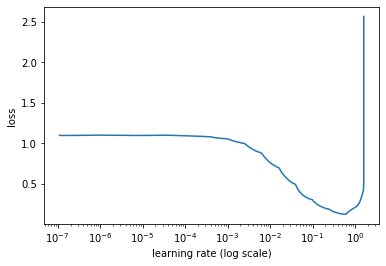

In [688]:
nbsvm_learner.lr_find(max_epochs=20)
nbsvm_learner.lr_plot()

simulating training for different learning rates... this may take a few moments...
Epoch 1/20
101/101 [==============================] - 0s 773us/step - loss: 1.1033 - accuracy: 0.3593
Epoch 2/20
101/101 [==============================] - 0s 756us/step - loss: 1.1033 - accuracy: 0.3593
Epoch 3/20
101/101 [==============================] - 0s 743us/step - loss: 1.1032 - accuracy: 0.3599
Epoch 4/20
101/101 [==============================] - 0s 741us/step - loss: 1.1031 - accuracy: 0.3630
Epoch 5/20
101/101 [==============================] - 0s 749us/step - loss: 1.1026 - accuracy: 0.3686
Epoch 6/20
101/101 [==============================] - 0s 747us/step - loss: 1.1016 - accuracy: 0.3748
Epoch 7/20
101/101 [==============================] - 0s 768us/step - loss: 1.0989 - accuracy: 0.3892
Epoch 8/20
101/101 [==============================] - 0s 754us/step - loss: 1.0921 - accuracy: 0.4421
Epoch 9/20
101/101 [==============================] - 0s 759us/step - loss: 1.0758 - accuracy: 0.5455

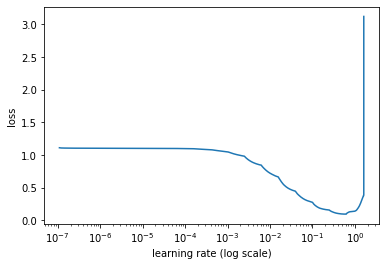

In [689]:
full_nbsvm_learner.lr_find(max_epochs=20)
full_nbsvm_learner.lr_plot()

### Train models

In [690]:
csv_logger = CSVLogger("nbsvm_model_history_log_autofit.csv", append=True)

# employs a triangular learning rate policy with both maximum
# and base learning rates reduced when validation loss stalls
startTime = time.time()
nbsvm_learner.autofit(0.6, reduce_on_plateau=3, callbacks=[csv_logger])
print ('NBSVM algorithm took {0} seconds to be trained!'.format(time.time() - startTime))

early_stopping automatically enabled at patience=5


begin training using triangular learning rate policy with max lr of 0.6...
Epoch 1/1024
101/101 [==============================] - 0s 2ms/step - loss: 1.3786 - accuracy: 0.6189 - val_loss: 4.0467 - val_accuracy: 0.5205
Epoch 2/1024
101/101 [==============================] - 0s 1ms/step - loss: 0.2844 - accuracy: 0.9222 - val_loss: 4.1731 - val_accuracy: 0.4912
Epoch 3/1024
101/101 [==============================] - 0s 1ms/step - loss: 0.0888 - accuracy: 0.9689 - val_loss: 4.2432 - val_accuracy: 0.5000
Epoch 4/1024
 59/101 [================>.............] - ETA: 0s - loss: 0.0349 - accuracy: 0.9894
Epoch 00004: Reducing Max LR on Plateau: new max lr will be 0.3 (if not early_stopping).
101/101 [==============================] - 0s 1ms/step - loss: 0.0470 - accuracy: 0.9844 - val_loss: 4.3506 - val_accuracy: 0.5058
Epoch 5/1024
101/101 [==============================] - 0s 1ms/step - loss: 0.0341 - accuracy: 0.9888 - val_loss: 4.3362 -

In [691]:
nbsvm_learner.validate(class_names=preproc_nbsvm.get_classes())

              precision    recall  f1-score   support

    positive       0.52      0.58      0.55       104
    negative       0.67      0.53      0.59       169
     neutral       0.31      0.42      0.36        69

    accuracy                           0.52       342
   macro avg       0.50      0.51      0.50       342
weighted avg       0.55      0.52      0.53       342



array([[60, 23, 21],
       [36, 89, 44],
       [20, 20, 29]])

In [692]:
csv_logger = CSVLogger("full_nbsvm_model_history_log_autofit.csv", append=True)

# employs a triangular learning rate policy with both maximum
# and base learning rates reduced when validation loss stalls
startTime = time.time()
full_nbsvm_learner.autofit(0.6, reduce_on_plateau=3, callbacks=[csv_logger])
print ('NBSVM algorithm with full text took {0} seconds to be trained!'.format(time.time() - startTime))

early_stopping automatically enabled at patience=5


begin training using triangular learning rate policy with max lr of 0.6...
Epoch 1/1024
101/101 [==============================] - 0s 2ms/step - loss: 1.4429 - accuracy: 0.6438 - val_loss: 3.9959 - val_accuracy: 0.5088
Epoch 2/1024
101/101 [==============================] - 0s 1ms/step - loss: 0.3258 - accuracy: 0.9203 - val_loss: 4.3861 - val_accuracy: 0.5000
Epoch 3/1024
101/101 [==============================] - 0s 1ms/step - loss: 0.0995 - accuracy: 0.9664 - val_loss: 4.3962 - val_accuracy: 0.4854
Epoch 4/1024
 56/101 [===============>..............] - ETA: 0s - loss: 0.0322 - accuracy: 0.9866
Epoch 00004: Reducing Max LR on Plateau: new max lr will be 0.3 (if not early_stopping).
101/101 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9819 - val_loss: 4.6508 - val_accuracy: 0.5000
Epoch 5/1024
101/101 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 0.9875 - val_loss: 4.6151 -

In [693]:
full_nbsvm_learner.validate(class_names=full_preproc_nbsvm.get_classes())

              precision    recall  f1-score   support

    positive       0.50      0.56      0.52       104
    negative       0.63      0.50      0.56       169
     neutral       0.35      0.46      0.40        69

    accuracy                           0.51       342
   macro avg       0.49      0.51      0.49       342
weighted avg       0.53      0.51      0.51       342



array([[58, 32, 14],
       [39, 84, 46],
       [20, 17, 32]])

### Making preditions and evaluating model

#### NBSVM - Clean Text

In [694]:
predictor_nbsvm = ktrain.get_predictor(nbsvm_learner.model, preproc_nbsvm)
classes = predictor_nbsvm.get_classes()
y_pred_nbsvm = predictor_nbsvm.predict(test_text["text"].tolist())

              precision    recall  f1-score   support

    negative       0.65      0.48      0.55       170
     neutral       0.24      0.37      0.29        70
    positive       0.44      0.46      0.45       105

    accuracy                           0.45       345
   macro avg       0.44      0.44      0.43       345
weighted avg       0.50      0.45      0.47       345



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

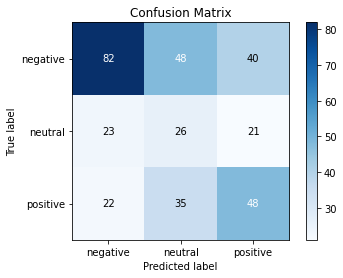

In [695]:
print(classification_report(test_text["sentiment"], y_pred_nbsvm))
skplt.metrics.plot_confusion_matrix(test_text["sentiment"], y_pred_nbsvm, cmap = plt.cm.Blues)

#### NBSVM - Clean Text

In [696]:
full_predictor_nbsvm = ktrain.get_predictor(full_nbsvm_learner.model, full_preproc_nbsvm)
classes = full_predictor_nbsvm.get_classes()
y_pred_nbsvm_full = full_predictor_nbsvm.predict(test_text["text"].tolist())

              precision    recall  f1-score   support

    negative       0.63      0.49      0.55       170
     neutral       0.25      0.39      0.30        70
    positive       0.47      0.47      0.47       105

    accuracy                           0.46       345
   macro avg       0.45      0.45      0.44       345
weighted avg       0.50      0.46      0.47       345



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

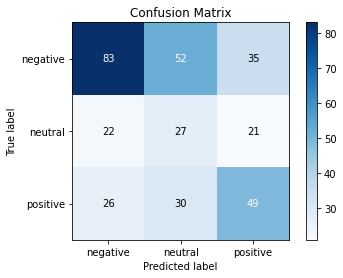

In [697]:
print(classification_report(test_text["sentiment"], y_pred_nbsvm_full))
skplt.metrics.plot_confusion_matrix(test_text["sentiment"], y_pred_nbsvm_full, cmap = plt.cm.Blues)